In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv('Updates_dataset.csv')

In [3]:
df['Cuisine_Count'] = df['Cuisines'].apply(lambda x: len(str(x).split(", ")))
df['Cuisine_Count']

0       3
1       1
2       4
3       2
4       2
       ..
9546    1
9547    3
9548    2
9549    1
9550    1
Name: Cuisine_Count, Length: 9551, dtype: int64

In [4]:
df['Cost_Category'] = df['Price range'].map({ 1: 'Low', 2: 'Medium', 3: 'High', 4: 'Premium'})
df['Cost_Category']

0         High
1         High
2          NaN
3          NaN
4          NaN
         ...  
9546      High
9547      High
9548       NaN
9549       NaN
9550    Medium
Name: Cost_Category, Length: 9551, dtype: object

In [5]:
# Rating_group is derived from target -> Do not use it for modeling

def rating_group(r):
    if r >= 4.5:
        return 'Excellent'
    elif r >= 3.5:
        return 'Good'
    elif r >= 2.5:
        return 'Average'
    else:
        return 'Poor'

df['Rating_group'] = df['Aggregate rating'].apply(rating_group)
df['Rating_group']

0       Excellent
1       Excellent
2            Good
3       Excellent
4       Excellent
          ...    
9546         Good
9547         Good
9548         Good
9549         Good
9550         Good
Name: Rating_group, Length: 9551, dtype: object

In [ ]:
df_model = df.drop(columns = ['Aggregate rating', 'Rating_group'])

leakage_cols = ['Rating color', 'Rating text']
df_model = df_model.drop(columns=[c for c in leakage_cols if c in df_model.columns])

df_encoded = pd.get_dummies(df_model, drop_first=True)
X = df_encoded
y = df['Aggregate rating']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 42)


In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse =np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 0.08100392525493813
Mean Absolute Error: 0.2228979856886877
Root Mean Squared Error: 0.2846118853016123
R^2 Score: 0.9470573164895018


In [9]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred =dt.predict(X_test)

mse_dt = mean_squared_error(y_test, dt_pred)
mae_dt = mean_absolute_error(y_test, dt_pred)
rmse_dt =np.sqrt(mse_dt)
r2_dt = r2_score(y_test, dt_pred)
print("Decision Tree Regressor Performance:")
print("Mean Squared Error:", mse_dt)
print("Mean Absolute Error:", mae_dt)
print("Root Mean Squared Error:", rmse_dt)
print("R^2 Score:", r2_dt)

Decision Tree Regressor Performance:
Mean Squared Error: 0.053563579277864995
Mean Absolute Error: 0.14463631606489258
Root Mean Squared Error: 0.23143806790989463
R^2 Score: 0.9649918245755058


In [10]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, rf_pred)
mae_rf = mean_absolute_error(y_test, rf_pred)
rmse_rf =np.sqrt(mse_rf)
r2_rf = r2_score(y_test, rf_pred)
print("Random Forest Regressor Performance:")
print("Mean Squared Error:", mse_rf)
print("Mean Absolute Error:", mae_rf)
print("Root Mean Squared Error:", rmse_rf)
print("R^2 Score:", r2_rf)

Random Forest Regressor Performance:
Mean Squared Error: 0.027009537938252177
Mean Absolute Error: 0.10882522239665274
Root Mean Squared Error: 0.16434578771070518
R^2 Score: 0.9823470601661676


In [11]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

mse_gb = mean_squared_error(y_test, gb_pred)
mae_gb = mean_absolute_error(y_test, gb_pred)
rmse_gb =np.sqrt(mse_gb)
r2_gb = r2_score(y_test, gb_pred)
print("Gradient Boosting Regressor Performance:")
print("Mean Squared Error:", mse_gb)
print("Mean Absolute Error:", mae_gb)
print("Root Mean Squared Error:", rmse_gb)
print("R^2 Score:", r2_gb)

Gradient Boosting Regressor Performance:
Mean Squared Error: 0.026363338087264612
Mean Absolute Error: 0.11551730376031423
Root Mean Squared Error: 0.16236790965971265
R^2 Score: 0.9827694045659938


In [12]:
results = pd.DataFrame({ 
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'], 
    'MSE': [mse, mse_dt, mse_rf, mse_gb], 
    'MAE': [mae, mae_dt, mae_rf, mae_gb], 
    'RMSE': [rmse, rmse_dt, rmse_rf, rmse_gb], 
    'R2 Score': [r2, r2_dt, r2_rf, r2_gb] })

results

,Model,MSE,MAE,RMSE,R2 Score
0,Linear Regression,0.081004,0.222898,0.284612,0.947057
1,Decision Tree,0.053564,0.144636,0.231438,0.964992
2,Random Forest,0.027010,0.108825,0.164346,0.982347
3,Gradient Boosting,0.026363,0.115517,0.162368,0.982769


Baseline Insight:
Linear Regression assumes linear relationships.
Tree-based models significantly outperform it,
indicating strong non-linear interactions in the data.

In [ ]:
# Cross-Validation

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [14]:
cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_results[name] = { "Mean CV R2": scores.mean(), "Std CV R2": scores.std()}

cv_results_df = pd.DataFrame(cv_results).T
cv_results_df

,Mean CV R2,Std CV R2
Linear Regression,0.893762,0.084628
Decision Tree,0.968425,0.002750
Random Forest,0.981723,0.001197
Gradient Boosting,0.981782,0.001064


In [15]:
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'subsample': [0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=gb_params,
    n_iter=10,          # reduced
    cv=3,               # reduced
    scoring='r2',
    n_jobs=1,           # VERY IMPORTANT for Windows
    random_state=42
)

random_search.fit(X_train, y_train)
best_gb = random_search.best_estimator_

print("Best Parameters:", random_search.best_params_)
print("Best CV R2 Score:", random_search.best_score_)

Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1}
Best CV R2 Score: 0.9820773950193699


In [16]:
y_test_pred = best_gb.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print("Final Tuned Gradient Boosting Performance")
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

Final Tuned Gradient Boosting Performance
MSE: 0.025735976668849744
MAE: 0.11300476945421181
RMSE: 0.1604243643242813
R2 Score: 0.9831794365109557


In [16]:
print("\nModel Improvement Summary:")
print(f"Untuned Gradient Boosting R2: {r2_gb:.4f}")
print(f"Tuned Gradient Boosting R2  : {r2_final:.4f}")
print(f"Performance Gain            : {r2_final - r2_gb:.4f}")


Model Improvement Summary:
Untuned Gradient Boosting R2: 0.9828


NameError: name 'r2_final' is not defined

In [17]:
feature_importance = pd.Series(
    best_gb.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

feature_importance.head(15)


Votes                     0.465500
Rating text_Not rated     0.330279
Rating color_Orange       0.076627
Rating_group_Poor         0.045772
Rating color_White        0.030245
Rating color_Red          0.018329
Rating text_Good          0.011669
Rating color_Yellow       0.005117
Rating text_Excellent     0.003298
Rating_group_Good         0.001888
Restaurant ID             0.001881
Rating_group_Excellent    0.001856
Rating text_Poor          0.001210
Rating color_Green        0.000494
Latitude                  0.000476
dtype: float64

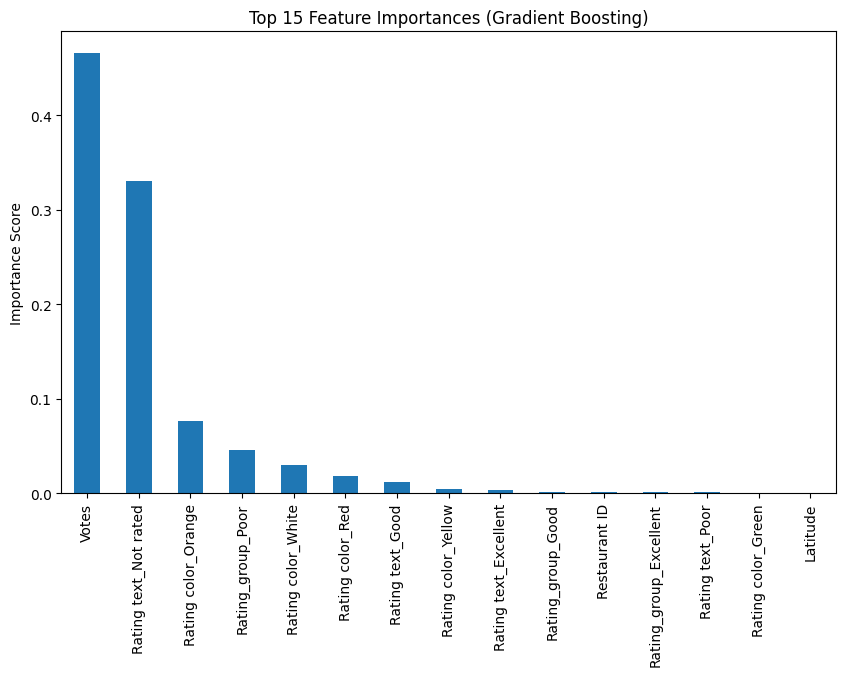

In [19]:
plt.figure(figsize=(10,6))
feature_importance.head(15).plot(kind='bar')
plt.title("Top 15 Feature Importances (Gradient Boosting)")
plt.ylabel("Importance Score")
plt.show()

In [20]:
import joblib

joblib.dump(best_gb, "final_gradient_boosting_model.pkl")
print("Model saved successfully.")

Model saved successfully.
